In [ ]:
#Ce projet predit la date de sortie  à l'hopital d'un patient en fonction de
#son age, son sexe, le service dans lequel il/elle interné, et la maladie
#dont il/elle souffre.

#Nous avons utilisé 8 differents modeles afin de trouver le modele
#qui predit mieux notre probleme. Ces modeles sont les suivants:
    ##Random Forest Regressor avec GridSearchCV39
    ##Support Vector Regressor avec GridSearchCV
    ##Ridge avec GridSearchCV
    ##Random Forest Regressor sans GridSearchCV
    ##Regression Lineaire sans GridSearchCV
    ##Extra Trees Regressor sans GridSearchCV
    ##Arbre de decision avec GridSearchCV
    ##KNN Regressor avec GridSearchCV
    
#Nous avons évalué le modele en utilisant (r2, Mean Absolute Error, Mean
#Squared Error et Root Mean Square Error (RMSE)) étant donné que nous avons
#eu  à faire  à un probleme de regression. Mais aussi nous avons utilisé le
#accuracy pour évaluer la performance.

#MAE est une mesure de performance/qualité pour évaluer la performance 
#de votre modèle ML, une fois finalisé dans le cadre d'une regression
#En statistique, l'erreur absolue moyenne (MAE) est un moyen de mesurer 
#l'accuracy d'un modèle donné.
#L'erreur absolue moyenne (MAE) s'avère être de 40.52 pour le modele Extra
#Trees Regressor.
#Cela nous indique que la différence moyenne entre la valeur réelle des 
#données et la valeur prédite par le modèle est de 40.52.
#Plus MAE est faible pour un modèle donné, plus le modèle est capable de 
#prédire les valeurs réelles.

#r2_score
#Le meilleur score possible est 1.0 et il peut être négatif 
#(car le modèle peut être arbitrairement plus mauvais).
#Un modèle constant qui prédit toujours la valeur attendue de y, 
#sans tenir compte des caractéristiques d'entrée, obtiendrait 
#un r2 score de 0.0.

#MSE
#L'erreur quadratique moyenne(MSE en anglais) indique à quel point une ligne
#de régression est proche d'un ensemble de points. Pour ce faire, elle prend
#les distances entre les points et la ligne de régression
#(ces distances sont les "erreurs") et les élève au carré. 
#L'élévation au carré est nécessaire pour supprimer tout signe négatif. 
#Elle donne également plus de poids aux différences les plus importantes. 
#On l'appelle l'erreur quadratique moyenne car vous trouvez la moyenne d'un
#ensemble d'erreurs. Plus le MSE est faible, meilleure est la prévision.

#RMSE
#L'erreur quadratique moyenne (RMSE) est l'écart type des résidus 
#(erreurs de prédiction). Les résidus sont une mesure de l'éloignement des
#points de données par rapport à la ligne de régression ; RMSE est une
#mesure de la dispersion de ces résidus. En d'autres termes, elle indique 
#à quel point les données sont concentrées autour de la ligne de meilleur
#ajustement. L'erreur quadratique moyenne est couramment utilisée en 
#climatologie, en prévision et en analyse de régression pour vérifier les 
#résultats expérimentaux.

In [1]:
import pandas as pd
monData=pd.read_csv('D:\mon_dataset_ok.csv')

In [2]:
monData

,Numero,date_entree,date_sortie,Genre,Age,Maladie,Service
0,1,1/2/2010,1/7/2010,F,12,palustose,Pediatrie
1,2,1/2/2010,1/8/2010,F,30,diabete,Hospitalisation
2,3,1/2/2010,1/9/2010,M,6,hernie,Pediatrie
3,4,1/2/2010,1/10/2010,M,23,infection et diabete,Hospitalisation
4,5,1/2/2010,1/11/2010,M,22,KOD,Gynecologie
...,...,...,...,...,...,...,...
833,834,8/21/2021,7/31/2021,M,3 jours,risque infectieux,Neonatologie
834,835,8/22/2021,8/1/2021,F,4 jours,bebe macroso,Neonatologie
835,836,8/23/2021,8/2/2021,M,5 jours,Faible poids de naissance,Neonatologie
836,837,8/24/2021,8/3/2021,M,6 jours,Faible poids de naissance,Neonatologie


# 1. Analyse Exploratoire des données

In [3]:
monData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Numero       838 non-null    int64 
 1   date_entree  837 non-null    object
 2   date_sortie  837 non-null    object
 3   Genre        838 non-null    object
 4   Age          838 non-null    object
 5   Maladie      837 non-null    object
 6   Service      836 non-null    object
dtypes: int64(1), object(6)
memory usage: 46.0+ KB


# 2. Pre-traitement des données

In [4]:
monData['Date_Entree']=pd.to_datetime(monData['date_entree'])

In [5]:
monData['Date_Sortie']=pd.to_datetime(monData['date_sortie'])

In [6]:
monData['Nombre_jour_passes']=monData['Date_Sortie']-monData['Date_Entree']

In [7]:
monData

,Numero,date_entree,date_sortie,Genre,Age,Maladie,Service,Date_Entree,Date_Sortie,Nombre_jour_passes
0,1,1/2/2010,1/7/2010,F,12,palustose,Pediatrie,2010-01-02,2010-01-07,5 days
1,2,1/2/2010,1/8/2010,F,30,diabete,Hospitalisation,2010-01-02,2010-01-08,6 days
2,3,1/2/2010,1/9/2010,M,6,hernie,Pediatrie,2010-01-02,2010-01-09,7 days
3,4,1/2/2010,1/10/2010,M,23,infection et diabete,Hospitalisation,2010-01-02,2010-01-10,8 days
4,5,1/2/2010,1/11/2010,M,22,KOD,Gynecologie,2010-01-02,2010-01-11,9 days
...,...,...,...,...,...,...,...,...,...,...
833,834,8/21/2021,7/31/2021,M,3 jours,risque infectieux,Neonatologie,2021-08-21,2021-07-31,-21 days
834,835,8/22/2021,8/1/2021,F,4 jours,bebe macroso,Neonatologie,2021-08-22,2021-08-01,-21 days
835,836,8/23/2021,8/2/2021,M,5 jours,Faible poids de naissance,Neonatologie,2021-08-23,2021-08-02,-21 days
836,837,8/24/2021,8/3/2021,M,6 jours,Faible poids de naissance,Neonatologie,2021-08-24,2021-08-03,-21 days


In [8]:
#On convertit les timedelta en jour
import numpy as np
monData['Nbre_jours'] = (monData['Nombre_jour_passes']/ np.timedelta64(1, 'D'))
monData

,Numero,date_entree,date_sortie,Genre,Age,Maladie,Service,Date_Entree,Date_Sortie,Nombre_jour_passes,Nbre_jours
0,1,1/2/2010,1/7/2010,F,12,palustose,Pediatrie,2010-01-02,2010-01-07,5 days,5.0
1,2,1/2/2010,1/8/2010,F,30,diabete,Hospitalisation,2010-01-02,2010-01-08,6 days,6.0
2,3,1/2/2010,1/9/2010,M,6,hernie,Pediatrie,2010-01-02,2010-01-09,7 days,7.0
3,4,1/2/2010,1/10/2010,M,23,infection et diabete,Hospitalisation,2010-01-02,2010-01-10,8 days,8.0
4,5,1/2/2010,1/11/2010,M,22,KOD,Gynecologie,2010-01-02,2010-01-11,9 days,9.0
...,...,...,...,...,...,...,...,...,...,...,...
833,834,8/21/2021,7/31/2021,M,3 jours,risque infectieux,Neonatologie,2021-08-21,2021-07-31,-21 days,-21.0
834,835,8/22/2021,8/1/2021,F,4 jours,bebe macroso,Neonatologie,2021-08-22,2021-08-01,-21 days,-21.0
835,836,8/23/2021,8/2/2021,M,5 jours,Faible poids de naissance,Neonatologie,2021-08-23,2021-08-02,-21 days,-21.0
836,837,8/24/2021,8/3/2021,M,6 jours,Faible poids de naissance,Neonatologie,2021-08-24,2021-08-03,-21 days,-21.0


In [9]:
#On supprime partout ou il y a des vides
monData=monData.dropna(axis=0, how='any')

In [10]:
monData

,Numero,date_entree,date_sortie,Genre,Age,Maladie,Service,Date_Entree,Date_Sortie,Nombre_jour_passes,Nbre_jours
0,1,1/2/2010,1/7/2010,F,12,palustose,Pediatrie,2010-01-02,2010-01-07,5 days,5.0
1,2,1/2/2010,1/8/2010,F,30,diabete,Hospitalisation,2010-01-02,2010-01-08,6 days,6.0
2,3,1/2/2010,1/9/2010,M,6,hernie,Pediatrie,2010-01-02,2010-01-09,7 days,7.0
3,4,1/2/2010,1/10/2010,M,23,infection et diabete,Hospitalisation,2010-01-02,2010-01-10,8 days,8.0
4,5,1/2/2010,1/11/2010,M,22,KOD,Gynecologie,2010-01-02,2010-01-11,9 days,9.0
...,...,...,...,...,...,...,...,...,...,...,...
833,834,8/21/2021,7/31/2021,M,3 jours,risque infectieux,Neonatologie,2021-08-21,2021-07-31,-21 days,-21.0
834,835,8/22/2021,8/1/2021,F,4 jours,bebe macroso,Neonatologie,2021-08-22,2021-08-01,-21 days,-21.0
835,836,8/23/2021,8/2/2021,M,5 jours,Faible poids de naissance,Neonatologie,2021-08-23,2021-08-02,-21 days,-21.0
836,837,8/24/2021,8/3/2021,M,6 jours,Faible poids de naissance,Neonatologie,2021-08-24,2021-08-03,-21 days,-21.0


In [11]:
monData['Nbre_jours']=monData['Nbre_jours'].abs()

<ipython-input-11-cfcb61682696>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monData['Nbre_jours']=monData['Nbre_jours'].abs()


In [12]:
monData=monData.drop(['date_entree','date_sortie','Nombre_jour_passes','Date_Sortie'],axis=1)

In [13]:
monData['Nbre_jours']=monData['Nbre_jours'].astype(int)

In [14]:
monData

,Numero,Genre,Age,Maladie,Service,Date_Entree,Nbre_jours
0,1,F,12,palustose,Pediatrie,2010-01-02,5
1,2,F,30,diabete,Hospitalisation,2010-01-02,6
2,3,M,6,hernie,Pediatrie,2010-01-02,7
3,4,M,23,infection et diabete,Hospitalisation,2010-01-02,8
4,5,M,22,KOD,Gynecologie,2010-01-02,9
...,...,...,...,...,...,...,...
833,834,M,3 jours,risque infectieux,Neonatologie,2021-08-21,21
834,835,F,4 jours,bebe macroso,Neonatologie,2021-08-22,21
835,836,M,5 jours,Faible poids de naissance,Neonatologie,2021-08-23,21
836,837,M,6 jours,Faible poids de naissance,Neonatologie,2021-08-24,21


In [15]:
monData['Age_Patient'] = monData.Age.str.extract(r'(^\d+)')

In [16]:
monData

,Numero,Genre,Age,Maladie,Service,Date_Entree,Nbre_jours,Age_Patient
0,1,F,12,palustose,Pediatrie,2010-01-02,5,12
1,2,F,30,diabete,Hospitalisation,2010-01-02,6,30
2,3,M,6,hernie,Pediatrie,2010-01-02,7,6
3,4,M,23,infection et diabete,Hospitalisation,2010-01-02,8,23
4,5,M,22,KOD,Gynecologie,2010-01-02,9,22
...,...,...,...,...,...,...,...,...
833,834,M,3 jours,risque infectieux,Neonatologie,2021-08-21,21,3
834,835,F,4 jours,bebe macroso,Neonatologie,2021-08-22,21,4
835,836,M,5 jours,Faible poids de naissance,Neonatologie,2021-08-23,21,5
836,837,M,6 jours,Faible poids de naissance,Neonatologie,2021-08-24,21,6


 Recuperation seulement des personnes moins d'un an

In [17]:
dataPatientMoinsUnan = monData.loc[monData['Age'].str.contains("jours|Jour", case=False)]

In [18]:
dataPatientMoinsUnan

,Numero,Genre,Age,Maladie,Service,Date_Entree,Nbre_jours,Age_Patient
177,178,M,5 Jours,I M M,Pediatrie,2013-05-04,46,5
178,179,M,1 Jour,G E febrile,Pediatrie,2013-05-05,36,1
183,184,M,1 Jour,I N N,Pediatrie,2014-05-10,45,1
186,187,F,14 Jours,Tardive probable,Pediatrie,2015-05-13,55,14
252,253,M,3 jours,Faible poids de naissance,Neonatologie,2010-07-18,67,3
...,...,...,...,...,...,...,...,...
833,834,M,3 jours,risque infectieux,Neonatologie,2021-08-21,21,3
834,835,F,4 jours,bebe macroso,Neonatologie,2021-08-22,21,4
835,836,M,5 jours,Faible poids de naissance,Neonatologie,2021-08-23,21,5
836,837,M,6 jours,Faible poids de naissance,Neonatologie,2021-08-24,21,6


In [19]:
dataPatientMoinsUnan['Age_Patient']=dataPatientMoinsUnan['Age_Patient'].astype(int)

<ipython-input-19-478c94bad3cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPatientMoinsUnan['Age_Patient']=dataPatientMoinsUnan['Age_Patient'].astype(int)


In [20]:
dataPatientMoinsUnan

,Numero,Genre,Age,Maladie,Service,Date_Entree,Nbre_jours,Age_Patient
177,178,M,5 Jours,I M M,Pediatrie,2013-05-04,46,5
178,179,M,1 Jour,G E febrile,Pediatrie,2013-05-05,36,1
183,184,M,1 Jour,I N N,Pediatrie,2014-05-10,45,1
186,187,F,14 Jours,Tardive probable,Pediatrie,2015-05-13,55,14
252,253,M,3 jours,Faible poids de naissance,Neonatologie,2010-07-18,67,3
...,...,...,...,...,...,...,...,...
833,834,M,3 jours,risque infectieux,Neonatologie,2021-08-21,21,3
834,835,F,4 jours,bebe macroso,Neonatologie,2021-08-22,21,4
835,836,M,5 jours,Faible poids de naissance,Neonatologie,2021-08-23,21,5
836,837,M,6 jours,Faible poids de naissance,Neonatologie,2021-08-24,21,6


In [21]:
dataPatientMoinsUnan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 177 to 837
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Numero       141 non-null    int64         
 1   Genre        141 non-null    object        
 2   Age          141 non-null    object        
 3   Maladie      141 non-null    object        
 4   Service      141 non-null    object        
 5   Date_Entree  141 non-null    datetime64[ns]
 6   Nbre_jours   141 non-null    int32         
 7   Age_Patient  141 non-null    int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(4)
memory usage: 8.8+ KB


In [22]:
dataPatientMoinsUnan['Age_Patient']=dataPatientMoinsUnan['Age_Patient'].div(365)

<ipython-input-22-61fe6756ab8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPatientMoinsUnan['Age_Patient']=dataPatientMoinsUnan['Age_Patient'].div(365)


In [23]:
dataPatientMoinsUnan

,Numero,Genre,Age,Maladie,Service,Date_Entree,Nbre_jours,Age_Patient
177,178,M,5 Jours,I M M,Pediatrie,2013-05-04,46,0.013699
178,179,M,1 Jour,G E febrile,Pediatrie,2013-05-05,36,0.002740
183,184,M,1 Jour,I N N,Pediatrie,2014-05-10,45,0.002740
186,187,F,14 Jours,Tardive probable,Pediatrie,2015-05-13,55,0.038356
252,253,M,3 jours,Faible poids de naissance,Neonatologie,2010-07-18,67,0.008219
...,...,...,...,...,...,...,...,...
833,834,M,3 jours,risque infectieux,Neonatologie,2021-08-21,21,0.008219
834,835,F,4 jours,bebe macroso,Neonatologie,2021-08-22,21,0.010959
835,836,M,5 jours,Faible poids de naissance,Neonatologie,2021-08-23,21,0.013699
836,837,M,6 jours,Faible poids de naissance,Neonatologie,2021-08-24,21,0.016438


 Recuperation seulement des personnes plus d'un an

In [24]:
dataPatientPlusUnan=monData[monData["Age"].str.contains("jours|Jour") == False]

In [25]:
dataPatientPlusUnan

,Numero,Genre,Age,Maladie,Service,Date_Entree,Nbre_jours,Age_Patient
0,1,F,12,palustose,Pediatrie,2010-01-02,5,12
1,2,F,30,diabete,Hospitalisation,2010-01-02,6,30
2,3,M,6,hernie,Pediatrie,2010-01-02,7,6
3,4,M,23,infection et diabete,Hospitalisation,2010-01-02,8,23
4,5,M,22,KOD,Gynecologie,2010-01-02,9,22
...,...,...,...,...,...,...,...,...
743,744,F,27,malaise gravidique,Gynecologie,2017-07-13,168,27
744,745,F,23,malaise gravidique,Gynecologie,2017-07-14,168,23
745,746,F,21,malaise gravidique,Gynecologie,2015-07-15,2024,21
746,747,F,31,malaise gravidique,Gynecologie,2021-07-16,168,31


 On combine les deux dataset pour avoir le dataset final

In [26]:
dataFinal = [dataPatientPlusUnan, dataPatientMoinsUnan]

In [27]:
dataFinal=pd.concat(dataFinal)

In [28]:
dataFinal

,Numero,Genre,Age,Maladie,Service,Date_Entree,Nbre_jours,Age_Patient
0,1,F,12,palustose,Pediatrie,2010-01-02,5,12
1,2,F,30,diabete,Hospitalisation,2010-01-02,6,30
2,3,M,6,hernie,Pediatrie,2010-01-02,7,6
3,4,M,23,infection et diabete,Hospitalisation,2010-01-02,8,23
4,5,M,22,KOD,Gynecologie,2010-01-02,9,22
...,...,...,...,...,...,...,...,...
833,834,M,3 jours,risque infectieux,Neonatologie,2021-08-21,21,0.008219
834,835,F,4 jours,bebe macroso,Neonatologie,2021-08-22,21,0.010959
835,836,M,5 jours,Faible poids de naissance,Neonatologie,2021-08-23,21,0.013699
836,837,M,6 jours,Faible poids de naissance,Neonatologie,2021-08-24,21,0.016438


In [29]:
dataFinal=dataFinal.drop(['Age'],axis=1)

In [30]:
dataFinal

,Numero,Genre,Maladie,Service,Date_Entree,Nbre_jours,Age_Patient
0,1,F,palustose,Pediatrie,2010-01-02,5,12
1,2,F,diabete,Hospitalisation,2010-01-02,6,30
2,3,M,hernie,Pediatrie,2010-01-02,7,6
3,4,M,infection et diabete,Hospitalisation,2010-01-02,8,23
4,5,M,KOD,Gynecologie,2010-01-02,9,22
...,...,...,...,...,...,...,...
833,834,M,risque infectieux,Neonatologie,2021-08-21,21,0.008219
834,835,F,bebe macroso,Neonatologie,2021-08-22,21,0.010959
835,836,M,Faible poids de naissance,Neonatologie,2021-08-23,21,0.013699
836,837,M,Faible poids de naissance,Neonatologie,2021-08-24,21,0.016438


In [31]:
age=dataFinal["Age_Patient"]
dataFinal.insert(2,'Age',age)

In [32]:
dataFinal=dataFinal.drop(['Numero','Age_Patient','Date_Entree'],axis=1)

In [33]:
dataFinal

,Genre,Age,Maladie,Service,Nbre_jours
0,F,12,palustose,Pediatrie,5
1,F,30,diabete,Hospitalisation,6
2,M,6,hernie,Pediatrie,7
3,M,23,infection et diabete,Hospitalisation,8
4,M,22,KOD,Gynecologie,9
...,...,...,...,...,...
833,M,0.008219,risque infectieux,Neonatologie,21
834,F,0.010959,bebe macroso,Neonatologie,21
835,M,0.013699,Faible poids de naissance,Neonatologie,21
836,M,0.016438,Faible poids de naissance,Neonatologie,21


In [34]:
dataFinal.Maladie.unique()

array(['palustose', 'diabete', 'hernie', 'infection et diabete', 'KOD',
       'choc emotionnel', 'infection uterine', 'Porte entr?e digestif',
       'paludisme', 'palustre', 'Palusisme', 'hernie bilaterale', 'MAP',
       'Paludisme', 'fievre', 'infection iterine', 'Hernie',
       'myome uterine', 'chute faciale', 'porte entr?e digestif',
       'Palustose', 'Palustre et Rhume', 'grippe et palustre',
       'infectieux ', 'Apprendiculaire', 'crise hypertension',
       'infectieux et diabete', 'Gastrite aigue', 'infectieux grippe',
       'infectieux', 'infectieux migneneux', 'effet du losorton',
       'affebrile', 'crise de moque', 'alteagique', 'ulcere gasto',
       'paludisme grave', 'Rhumatisme', 'encepholite aigue',
       'fievre de courte duree', 'obstobeptique', 'particolis', 'GEA',
       'Grippe et palustre', 'palmudisme', 'Palustre',
       'Detresse respiratoire', 'Fed', 'FCD', 'Bronchite Aigue',
       'Enterite febrile ', 'Enterite aigue', 'G E A A ',
       'Rhume B

On enleve les espaces dans la colonne Maladie

In [36]:
dataFinal['Maladie'] = dataFinal['Maladie'].str.rstrip() 

In [37]:
dataFinal.Maladie.unique()

array(['palustose', 'diabete', 'hernie', 'infection et diabete', 'KOD',
       'choc emotionnel', 'infection uterine', 'Porte entr?e digestif',
       'paludisme', 'palustre', 'Palusisme', 'hernie bilaterale', 'MAP',
       'Paludisme', 'fievre', 'infection iterine', 'Hernie',
       'myome uterine', 'chute faciale', 'porte entr?e digestif',
       'Palustose', 'Palustre et Rhume', 'grippe et palustre',
       'infectieux', 'Apprendiculaire', 'crise hypertension',
       'infectieux et diabete', 'Gastrite aigue', 'infectieux grippe',
       'infectieux migneneux', 'effet du losorton', 'affebrile',
       'crise de moque', 'alteagique', 'ulcere gasto', 'paludisme grave',
       'Rhumatisme', 'encepholite aigue', 'fievre de courte duree',
       'obstobeptique', 'particolis', 'GEA', 'Grippe et palustre',
       'palmudisme', 'Palustre', 'Detresse respiratoire', 'Fed', 'FCD',
       'Bronchite Aigue', 'Enterite febrile', 'Enterite aigue', 'G E A A',
       'Rhume Bronchute', 'F C D', 'G E

In [38]:
dataFinal.Service.unique()

array(['Pediatrie', 'Hospitalisation', 'Gynecologie', 'Neonatologie'],
      dtype=object)

In [39]:
dataFinal.Genre.unique()

array(['F', 'M'], dtype=object)

Encodage des variables

In [40]:
dataFinal['Genre']=dataFinal['Genre'].replace(['F', 'M'],[0,1])

In [41]:
dataFinal

,Genre,Age,Maladie,Service,Nbre_jours
0,0,12,palustose,Pediatrie,5
1,0,30,diabete,Hospitalisation,6
2,1,6,hernie,Pediatrie,7
3,1,23,infection et diabete,Hospitalisation,8
4,1,22,KOD,Gynecologie,9
...,...,...,...,...,...
833,1,0.008219,risque infectieux,Neonatologie,21
834,0,0.010959,bebe macroso,Neonatologie,21
835,1,0.013699,Faible poids de naissance,Neonatologie,21
836,1,0.016438,Faible poids de naissance,Neonatologie,21


In [42]:
dataFinal['Service']=dataFinal['Service'].map({'Pediatrie':0, 'Hospitalisation':1,
                                               'Gynecologie':2, 'Neonatologie':3})

In [43]:
dataFinal

,Genre,Age,Maladie,Service,Nbre_jours
0,0,12,palustose,0,5
1,0,30,diabete,1,6
2,1,6,hernie,0,7
3,1,23,infection et diabete,1,8
4,1,22,KOD,2,9
...,...,...,...,...,...
833,1,0.008219,risque infectieux,3,21
834,0,0.010959,bebe macroso,3,21
835,1,0.013699,Faible poids de naissance,3,21
836,1,0.016438,Faible poids de naissance,3,21


In [44]:
# Nous créons REPLACE_LIST comme une astuce pour nous aider à adapter les noms des maladies qui 
#sont dans dataFinal['Maladie'] afin d'eviter des doublons
REPLACE_LIST={
    "palustose":"Palustose", 
    "diabete":"Diabète", 
    "hernie":"Hernie", 
    "infection et diabete":"Infection et Diabète", 
    "KOD":"KOD",
    "choc emotionnel":"Choc emotionnel", 
    "infection uterine":"Infection utérine", 
    "Porte entr?e digestif":"Porte entrée digestive",
    "paludisme":"Paludisme", 
    "palustre":"Palustre", 
    "Palusisme":"Paludisme", 
    "hernie bilaterale":"Hernie bilatérale", 
    "MAP":"MAP",
    "Paludisme":"Paludisme", 
    "fievre":"Fièvre",  
    "infection iterine":"Infection utérine", 
    "Hernie":"Hernie",
    "myome uterine":"Myome utérine", 
    "chute faciale":"Chute faciale", 
    "porte entr?e digestif":"Porte entrée digestive",
    "Palustose":"Palustose", 
    "Palustre et Rhume":"Palustre et Rhume", 
    "grippe et palustre":"Grippe et palustre",
    "infectieux":"Infection", 
    "Apprendiculaire":"Apprendiculaire", 
    "crise hypertension":"Crise hypertension",
    "infectieux et diabete":"Infection et Diabète",
    "Gastrite aigue":"Gastrite aiguë", 
    "infectieux grippe":"Infection grippe",
    "infectieux migneneux":"Infection migneneux", 
    "effet du losorton":"Effet du losorton", 
    "affebrile":"Affebrile",
    "crise de moque":"Crise de moque", 
    "alteagique":"Alteagique", 
    "ulcere gasto":"Ulcère gastro", 
    "paludisme grave":"Paludisme grave",
    "Rhumatisme":"Rhumatisme", 
    "encepholite aigue":"Encepholite aiguë", 
    "fievre de courte duree":"Fièvre de courte durée",
    "obstobeptique":"Obstobeptique", 
    "particolis":"Particolis", 
    "GEA":"GEAA", 
    "Grippe et palustre":"Grippe et palustre",
    "palmudisme":"Paludisme", 
    "Palustre":"Palustre", 
    "Detresse respiratoire":"Detresse respiratoire", 
    "Fed":"FCD", 
    "FCD":"FCD",
    "Bronchite Aigue":"Bronchite aiguë", 
    "Enterite febrile":"Entérite febrile", 
    "Enterite aigue":"Entérite aiguë", 
    "G E A A":"GEAA",
    "Rhume Bronchute":"Rhume bronchite", 
    "F C D":"FCD", 
    "G E A":"GEAA", 
    "afebrile":"Affebrile", 
    "Bronchite":"Bronchite",
    "G E A F":"GEA febrile", 
    "GEA febrile":"GEA febrile", 
    "Grande prematur?":"Grande prématurée", 
    "Infectieux":"Infection",
    "G E A febrile":"GEA febrile", 
    "Hypertetique":"Hypertetique", 
    "fiere courte duree":"Fièvre de courte durée", 
    "sepsis":"Sepsis",
    "Enterite febaine":"Entérite febrile", 
    "Palustre grave":"Palustre grave", 
    "afebrite":"Affebrile", 
    "I N N":"IN natale", 
    "Rhume":"Rhume",
    "Avortement incomplet":"Avortement incomplet", 
    "avortement":"Avortement", 
    "MAV":"MAV", 
    "Salmonellose":"Salmonellose",
    "Palusure":"Palustre", 
    "infection couchaire":"Infection couchaire", 
    "hygie du trime":"Hygiène du trime",
    "cyslite aigue probable":"Cystite aiguë probable", 
    "palut":"Paludisme", 
    "malaise gravidique":"Malaise gravidique", 
    "G":"G",
    "Polytraumatique":"Polytraumatique", 
    "dyspeptique et choc emotionnel":"Traumatisme du bassin",
    "dyspeptique et choc emotionnel":"Dyspeptique et choc emotionnel", 
    "Demence serile":"Demence senile", 
    "Prositose":"Prositose",
    "I M M":"IMM", 
    "G E febrile":"GE febrile", 
    "Tardive probable":"Tardive probable",
    "Faible poids de naissance":"Faible poids de naissance", 
    "macrosonie":"Macrosomie", 
    "risque infectieux":"Risque infectieux",
    "IN Natale":"IN natale", 
    "hypotrope":"Hypotrophie", 
    "bebe macroso":"Macrosomie", 
    "macroso":"Macrosomie",
    "petit premature":"Petit prématuré", 
    "Asphysie reonatale":"Asphyxie néonatale", 
    "Premature Asphysie":"Prématuré asphyxié"    
}
# Nous remplaçons le nom des pays afin de pouvoir faire correspondre les maladies dans les données
dataFinal["Maladie"] = dataFinal["Maladie"].replace(REPLACE_LIST)

In [45]:
dataFinal

,Genre,Age,Maladie,Service,Nbre_jours
0,0,12,Palustose,0,5
1,0,30,Diabète,1,6
2,1,6,Hernie,0,7
3,1,23,Infection et Diabète,1,8
4,1,22,KOD,2,9
...,...,...,...,...,...
833,1,0.008219,Risque infectieux,3,21
834,0,0.010959,Macrosomie,3,21
835,1,0.013699,Faible poids de naissance,3,21
836,1,0.016438,Faible poids de naissance,3,21


In [46]:
dataFinal['Comp']=dataFinal['Maladie'] #On ajoute cette colonne pour nous aider a trouver les 
#valeurs corrspondant aux Maladies

In [47]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [48]:
dataFinal.loc[:,['Maladie']]=dataFinal.loc[:,['Maladie']].apply(enc.fit_transform)

In [49]:
dataFinal

,Genre,Age,Maladie,Service,Nbre_jours,Comp
0,0,12,54,0,5,Palustose
1,0,30,15,1,6,Diabète
2,1,6,32,0,7,Hernie
3,1,23,41,1,8,Infection et Diabète
4,1,22,45,2,9,KOD
...,...,...,...,...,...,...
833,1,0.008219,67,3,21,Risque infectieux
834,0,0.010959,48,3,21,Macrosomie
835,1,0.013699,22,3,21,Faible poids de naissance
836,1,0.016438,22,3,21,Faible poids de naissance


In [50]:
dataFinal.isnull().sum()

Genre         0
Age           0
Maladie       0
Service       0
Nbre_jours    0
Comp          0
dtype: int64

In [51]:
dataFinal.Maladie.unique()

array([54, 15, 32, 41, 45,  8, 44, 61, 52, 55, 33, 46, 23, 50,  9, 56, 31,
       39,  2, 11, 29, 42, 43, 17,  0, 10,  1, 72, 53, 64, 18, 24, 51, 58,
       28, 14, 21,  7, 20, 19, 66,  6, 27, 30, 35, 69, 57, 38, 65,  5,  4,
       47, 68, 40, 34, 12, 49, 25, 60, 71, 16, 13, 62, 37, 26, 70, 22, 48,
       67, 36, 59,  3, 63])

In [52]:
dataFinal=dataFinal.drop(['Comp'],axis=1)

In [53]:
"""
#Les valeurs correspondant aux strings

Ulcère gastro=72,
Traumatisme du bassin=71,
Tardive probable=70,
Sepsis=69, 
Salmonellose=68, 
Risque infectieux=67,
Rhume bronchite=66, 
Rhume=65,
Rhumatisme=64,
Prématuré asphyxié=63, 
Prositose=62,
Porte entrée digestive=61,
Polytraumatique=60, 
Petit prématuré=59, 
Particolis=58,
Palustre grave=57, 
Palustre et Rhume=56,
Palustre=55, 
Palustose=54,
Paludisme grave=53,
Paludisme=52,
Obstobeptique=51,
Myome utérine=50,
Malaise gravidique=49, 
Macrosomie=48,
MAV=47,
MAP=46, 
KOD=45,
Infection utérine=44,
Infection migneneux=43,
Infection grippe=42, 
Infection et Diabète=41, 
Infection couchaire=40, 
Infection=39,  
IN natale=38, 
IMM=37,  
Hypotrophie=36,
Hypertetique=35,  
Hygiène du trime=34,
Hernie bilatérale=33,
Hernie=32, 
Grippe et palustre=31,
Grande prématurée=30,
Gastrite aiguë=29, 
GEAA=28,
GEA febrile=27, 
GE febrile=26,
G=25,
Fièvre de courte durée=24,
Fièvre=23, 
Faible poids de naissance=22,
FCD=21,
Entérite febrile=20, 
Entérite aiguë=19, 
Encepholite aiguë=18, 
Effet du losorton=17, 
Dyspeptique et choc emotionnel=16,  
Diabète=15, 
Detresse respiratoire=14,
Demence senile=13,
Cystite aiguë probable=12,
Crise hypertension=11,
Crise de moque=10, 
Chute faciale=9,
Choc emotionnel=8,
Bronchite aiguë=7,
Bronchite=6,
Avortement incomplet=5, 
Avortement=4,
Asphyxie néonatale=3, 
Apprendiculaire=2,
Alteagique=1,
Affebrile=0,
"""

'\n#Les valeurs correspondant aux strings\n\nUlcère gastro=72,\nTraumatisme du bassin=71,\nTardive probable=70,\nSepsis=69, \nSalmonellose=68, \nRisque infectieux=67,\nRhume bronchite=66, \nRhume=65,\nRhumatisme=64,\nPrématuré asphyxié=63, \nPrositose=62,\nPorte entrée digestive=61,\nPolytraumatique=60, \nPetit prématuré=59, \nParticolis=58,\nPalustre grave=57, \nPalustre et Rhume=56,\nPalustre=55, \nPalustose=54,\nPaludisme grave=53,\nPaludisme=52,\nObstobeptique=51,\nMyome utérine=50,\nMalaise gravidique=49, \nMacrosomie=48,\nMAV=47,\nMAP=46, \nKOD=45,\nInfection utérine=44,\nInfection migneneux=43,\nInfection grippe=42, \nInfection et Diabète=41, \nInfection couchaire=40, \nInfection=39,  \nIN natale=38, \nIMM=37,  \nHypotrophie=36,\nHypertetique=35,  \nHygiène du trime=34,\nHernie bilatérale=33,\nHernie=32, \nGrippe et palustre=31,\nGrande prématurée=30,\nGastrite aiguë=29, \nGEAA=28,\nGEA febrile=27, \nGE febrile=26,\nG=25,\nFièvre de courte durée=24,\nFièvre=23, \nFaible poids de

In [54]:
dataFinal

,Genre,Age,Maladie,Service,Nbre_jours
0,0,12,54,0,5
1,0,30,15,1,6
2,1,6,32,0,7
3,1,23,41,1,8
4,1,22,45,2,9
...,...,...,...,...,...
833,1,0.008219,67,3,21
834,0,0.010959,48,3,21
835,1,0.013699,22,3,21
836,1,0.016438,22,3,21


# 3. Creation du modele

1. recuperation des features et du Target

In [55]:
X=dataFinal.drop(['Nbre_jours'],axis=1)
y=dataFinal['Nbre_jours']

2. Division du dataset en training et test set

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.25,random_state=123)

3. Utilisation de Random Forest Regressor comme algorithme

3.1. Nous appliquons le GridSearchCV pour optimiser le modele

In [58]:
# La grille des Hyperparametres de Random Forest Regressor sont comme suit:
##1. n_estimators = nombre d'arbres dans la foret 
##2. max_features = nombre max des features considerés pour
     #pour diviser les noeuds
##3. max_depth = nombre max des niveaux dans chaque arbre de decision 
##4. min_samples_split = nombre min des points des données placés 
     #dans un noeud avant qu'on le divise
##5. min_samples_leaf = nombre min des points des données permis dans une 
     #feille de noeud
##6. bootstrap = méthode d'échantillonnage de points de données
     #(avec ou sans remplacement)
##7. etc.
from sklearn.model_selection import GridSearchCV
# Création de la grille de paramètres basée sur les résultats de la
#recherche aléatoire. 
grille_des_parametres = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

3.2 Instatiation du modele Random Forest

In [59]:
# Creation du modele
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
# Instantiate the grid search model
grid_search=GridSearchCV(estimator = random_forest, 
                         param_grid = grille_des_parametres, 
                         cv = 3, n_jobs = -1, verbose = 2)
#N.B: n_jobs dans le GridSearchCV specifie le nombre de travaux (jobs) 
#à exécuter en parallèle.
#None signifie 1 sauf dans un contexte joblib.parallel_backend.
#Tandisque n_jobs=-1 signifie utiliser tous les processeurs
#Verbose est un entier qui contrôle la verbosité : 
##plus elle est élevée, plus il y a de messages.
#>1 : le temps de calcul pour chaque pli et paramètre candidat est affiché;
#>2 : le score est également affiché ;
#>3 : les index des plis et des paramètres candidats sont également 
#affichés ainsi que l'heure de début du calcul.

3.3. Entrainement du modele pour trouver les meilleurs parametres

In [60]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [61]:
#On affiche les meilleurs parametres qui peuvent optimiser notre modele
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

3.4. Construction de notre modele avec des parametres obtenus

3.4.1. Entrainement du modele

In [62]:
#On met les parametres tel que affichés en haut
model=RandomForestRegressor(bootstrap=True,max_depth=90,max_features=2,
                            min_samples_leaf=5,min_samples_split=10,
                            n_estimators=100)
#On entraine le modele
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=90, max_features=2, min_samples_leaf=5,
                      min_samples_split=10)

3.4.2. Utilisation du modele pour l'evaluer apres

In [63]:
y_predict=model.predict(X_test)

3.4.3. Evaluation du modele en utilisant r2, MSE, RMSE et MAE

In [64]:
from sklearn import metrics
import numpy as np
mae_rfrtuned= metrics.mean_absolute_error(y_test,y_predict)
r2_score_rfrtuned=metrics.r2_score(y_test,y_predict)
mse_rfrtuned= metrics.mean_squared_error(y_test, y_predict)
rmse_rfrtuned= np.sqrt(metrics.mean_squared_error(y_test, y_predict))
accuracy_rfrtuned=model.score(X_test,y_test)

4. SVR

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svr_model=SVR(kernel='rbf',gamma=1,C=1)

In [66]:
from sklearn import preprocessing
X_train_scale=preprocessing.scale(X_train)
X_test_scale=preprocessing.scale(X_test)
svr_model.fit(X_train_scale, y_train)

SVR(C=1, gamma=1)

In [67]:
y_predict_SVR=svr_model.predict(X_test_scale)

In [68]:
from sklearn import metrics
import numpy as np
mae_svr= metrics.mean_absolute_error(y_test,y_predict_SVR)
r2_score_svr=metrics.r2_score(y_test,y_predict_SVR)
mse_svr= metrics.mean_squared_error(y_test, y_predict_SVR)
rmse_svr= np.sqrt(metrics.mean_squared_error(y_test, y_predict_SVR))
accuracy_svr=svr_model.score(X_test,y_test)

5. Ridge

In [69]:
from sklearn.linear_model import Ridge
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid,
                    scoring='r2', verbose=1, n_jobs=-1)
#ridge = Ridge()
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  -0.1801986177521466
Best Params:  {'alpha': 1000}


In [70]:
ridge=Ridge(alpha=1000)
ridge.fit(X_train,y_train)

Ridge(alpha=1000)

In [71]:
y_predict_Ridge=ridge.predict(X_test)

In [72]:
from sklearn import metrics
import numpy as np
mae_ridge= metrics.mean_absolute_error(y_test,y_predict_Ridge)
r2_score_ridge=metrics.r2_score(y_test,y_predict_Ridge)
mse_ridge= metrics.mean_squared_error(y_test, y_predict_Ridge)
rmse_ridge= np.sqrt(metrics.mean_squared_error(y_test, y_predict_Ridge))
accuracy_ridge=ridge.score(X_test,y_test)

5. Random Forest Regressor sans GridSerachCV

In [73]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)

RandomForestRegressor()

In [74]:
y_predict_RF=RFR.predict(X_test)

In [75]:
from sklearn import metrics
import numpy as np
mae_RF= metrics.mean_absolute_error(y_test,y_predict_RF)
r2_score_RF=metrics.r2_score(y_test,y_predict_RF)
mse_RF= metrics.mean_squared_error(y_test, y_predict_RF)
rmse_RF= np.sqrt(metrics.mean_squared_error(y_test, y_predict_RF))
accuracy_RF=RFR.score(X_test,y_test)

6. Regression Lineaire

In [76]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [77]:
y_predict_lreg=lreg.predict(X_test)

In [78]:
from sklearn import metrics
import numpy as np
mae_LR= metrics.mean_absolute_error(y_test,y_predict_lreg)
r2_score_LR=metrics.r2_score(y_test,y_predict_lreg)
mse_LR= metrics.mean_squared_error(y_test, y_predict_lreg)
rmse_LR= np.sqrt(metrics.mean_squared_error(y_test, y_predict_lreg))
accuracy_LR=lreg.score(X_test,y_test)

7. Extra Tree Regressor

In [79]:
from sklearn.ensemble import ExtraTreesRegressor
etr= ExtraTreesRegressor()
etr.fit(X_train,y_train)

ExtraTreesRegressor()

In [80]:
#On verifie les features les plus importants pour notre modele
etr.feature_importances_

array([0.0341704 , 0.73978964, 0.1494118 , 0.07662816])

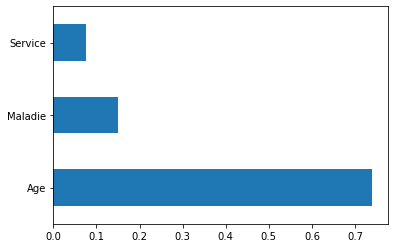

In [81]:
feat_importances = pd.Series(etr.feature_importances_, 
                             index=X_train.columns)
feat_importances.nlargest(3).plot(kind='barh')
import matplotlib.pyplot as plt
plt.show()

In [82]:
y_predict_etr=etr.predict(X_test)

In [83]:
from sklearn import metrics
import numpy as np
mae_ETR= metrics.mean_absolute_error(y_test,y_predict_etr)
r2_score_ETR=metrics.r2_score(y_test,y_predict_etr)
mse_ETR= metrics.mean_squared_error(y_test, y_predict_etr)
rmse_ETR= np.sqrt(metrics.mean_squared_error(y_test, y_predict_etr))
accuracy_ETR=etr.score(X_test,y_test)

8. Arbre de Decision

In [84]:
from sklearn.tree import DecisionTreeRegressor

In [85]:
# Initialisation de la gamme des hyper paramètres pour le réglage(tuning)

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

from sklearn.model_selection import GridSearchCV


In [86]:
from sklearn.tree import DecisionTreeRegressor
reg_decision_model=DecisionTreeRegressor()

In [87]:
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,
                          scoring='neg_mean_squared_error',cv=3,verbose=3)

In [88]:
# fonction permettant de calculer le temps nécessaire au réglage 
#des hyperparamètres

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod(
            (datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print(thour,":",tmin,':',round(tsec,2))

In [89]:
%%capture
from datetime import datetime

start_time=timer(None)

tuning_model.fit(X_train,y_train)

timer(start_time)

In [90]:
tuning_model.best_params_

{'max_depth': 3,
 'max_features': 'log2',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 10,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'random'}

In [91]:
#Entrainement de Decision Tree avec les meilleurs Hyperparametres
tuned_hyper_model= DecisionTreeRegressor(max_depth=3,max_features='log2',
                                         max_leaf_nodes=10,
                                         min_samples_leaf=10,
                                         min_weight_fraction_leaf=0.1,
                                         splitter='random')

In [92]:
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, max_features='log2', max_leaf_nodes=10,
                      min_samples_leaf=10, min_weight_fraction_leaf=0.1,
                      splitter='random')

In [93]:
tuned_pred=tuned_hyper_model.predict(X_test)

In [94]:
from sklearn import metrics

mae_dt=metrics.mean_absolute_error(y_test,tuned_pred)
r2_dt=metrics.r2_score(y_test,tuned_pred)
mse_dt=metrics.mean_squared_error(y_test, tuned_pred)
rmse_dt=np.sqrt(metrics.mean_squared_error(y_test, tuned_pred))
accuracy_dt=tuned_hyper_model.score(X_test,y_test)

9. KNN Regressor

In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [96]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

model_knn = GridSearchCV(knn, params, cv=5)

In [97]:
model_knn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [98]:
model_knn.best_params_

{'n_neighbors': 8}

In [99]:
knn_model=KNeighborsRegressor(n_neighbors=8)

In [100]:
knn_model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [101]:
knn_pred=knn_model.predict(x_test)

In [102]:
from sklearn import metrics

mae_knn=metrics.mean_absolute_error(y_test,knn_pred)
r2_knn=metrics.r2_score(y_test,tuned_pred)
mse_knn=metrics.mean_squared_error(y_test, knn_pred)
rmse_knn=np.sqrt(metrics.mean_squared_error(y_test, knn_pred))
accuracy_knn=knn_model.score(x_test,y_test)

# 4. Evaluation totale

In [103]:
models=['Random Forest Regressor avec GridSearchCV',
        'Support Vector Regressor avec GridSearchCV',
        'Ridge avec GridSearchCV',
        'Random Forest Regressor sans GridSearchCV',
        'Regression Lineaire sans GridSearchCV',
        'Extra Trees Regressor sans GridSearchCV',
        'Arbre de decision avec GridSearchCV',
       'KNN Regressor avec GridSearchCV']
mae=[round(mae_rfrtuned,2),round(mae_svr,2),round(mae_ridge,2),
     round(mae_RF,2),round(mae_LR,2),round(mae_ETR,2),round(mae_dt,2),
    round(mae_knn,2)]
r2=[round(r2_score_rfrtuned,2),round(r2_score_svr,2),
    round(r2_score_ridge,2),round(r2_score_RF,2),round(r2_score_LR,2),
    round(r2_score_ETR,2),round(r2_dt,2),round(r2_knn,2)]
mse=[round(mse_rfrtuned,2),round(mse_svr,2),round(mse_ridge,2),
     round(mse_RF,2),round(mse_LR,2),round(mse_ETR,2),round(mse_dt,2),
    round(mse_knn,2)]
rmse=[round(rmse_rfrtuned,2),round(rmse_svr,2),round(rmse_ridge,2),
      round(rmse_RF,2),round(rmse_LR,2),round(rmse_ETR,2),round(rmse_dt,2),
     round(rmse_knn,2)]
accuracy=[round(accuracy_rfrtuned,2),round(accuracy_svr,2),
          round(accuracy_ridge,2),round(accuracy_RF,2),round(accuracy_LR,2),
          round(accuracy_ETR,2),round(accuracy_dt,2),round(accuracy_knn,2)]
import pandas as pd
sommaire_evaluation=pd.DataFrame({'Models':models,
                                  'MAE':mae,
                                  'R2 Score':r2,
                                  'MSE': mse,
                                  'RMSE':rmse,
                                  'Accuracy': accuracy
                                   
})
sommaire_evaluation

,Models,MAE,R2 Score,MSE,RMSE,Accuracy
0,Random Forest Regressor avec GridSearchCV,74.65,0.30,73651.42,271.39,0.30
1,Support Vector Regressor avec GridSearchCV,75.26,-0.04,109389.01,330.74,-0.04
2,Ridge avec GridSearchCV,102.25,0.01,103789.39,322.16,0.01
3,Random Forest Regressor sans GridSearchCV,50.15,0.65,36987.96,192.32,0.65
4,Regression Lineaire sans GridSearchCV,107.33,0.01,103893.56,322.33,0.01
5,Extra Trees Regressor sans GridSearchCV,40.52,0.72,29533.09,171.85,0.72
6,Arbre de decision avec GridSearchCV,113.38,-0.01,106421.17,326.22,-0.01
7,KNN Regressor avec GridSearchCV,89.03,-0.01,98291.88,313.52,0.06


In [104]:
#Nous constatons que Extra Tress Regressor a donne un r2_score de 0.72, 
#ce qui est proche de 1 et son Mean Absolute Error est plus petit que pour
#les autres modeles. Et, son accuracy et de 72%. Ainsi, nous optons pour ce
#modele

# 5. Exportation du modele

In [105]:
import joblib
#On sauvegarde notre modele (extra trees) dans le chemin ci-apres:
joblib.dump(etr,
            r'C:\Users\user\Dropbox\Cours\DataMining\ProjetFinalDeploiement\ModelL2CSI2021.ml')

['C:\\Users\\user\\Dropbox\\Cours\\DataMining\\ProjetFinalDeploiement\\ModelL2CSI2021.ml']

# 6. Utilisation du modele

In [118]:
import numpy as np
model_load=joblib.load(r'C:\Users\user\Dropbox\Cours\DataMining\ProjetFinalDeploiement\ModelL2CSI2021.ml')
#Cette liste prend les features (Genre, Age, Maladie, Service)
#0: Genre F
#12: Age
#54: Maladie(Palustose)
#0: Service (Pediatrie)
#Selon les donnees du dataset, ce Patient a ete delivre apres 5 jours
list1=[0,12,54,0,'09/06/2021']
#On recupere la derniere valeur de la liste(cad date d'entree a l'hopital)
date_hospitalisation =list1[-1]

In [119]:
date_hospitalisation

'09/06/2021'

In [120]:
#On recupere toutes les valeur de la liste sauf la derniere
features_model = [list1[0],list1[1],list1[2],list1[3]] 

In [121]:
features_model

[0, 12, 54, 0]

In [122]:
#On reshape les features
features_model=np.array([features_model]).reshape(1,4)

In [125]:
#On predit en utilisant le modele loaded
prediction=model_load.predict(features_model)[0]

In [126]:
prediction

5.0

In [138]:
date_entree_hopital=pd.to_datetime(date_hospitalisation)

In [139]:
date_entree_hopital

Timestamp('2021-09-06 00:00:00')

In [153]:
from datetime import datetime,timedelta
#Nous ajoutons les jours predits de sortie a l'hopital a la date saisie
#de l'entree a l'hopital pour trouver la date de sortie
date_sortie_hopital = date_entree_hopital + timedelta(days=prediction)

In [154]:
date_sortie_hopital

Timestamp('2021-09-11 00:00:00')

In [166]:
#On recupere le jour en francais(Par exemple Samedi, Lundi...)
jour_semaine_sortie=date_sortie_hopital.day_name(locale='French')
#On recupere le mois en francais(Par exemple Janvier, Mars...)
mois_sortie=date_sortie_hopital.month_name(locale='French')
#On recupere l'annee de sortie de l'hopital(Par exemple 2021)
annee_sortie = date_sortie_hopital.year
#On recupere le jour de sortie de l'hopital(Par exemple 11, 25, 30)
jour_date_sortie = date_sortie_hopital.day

In [168]:
chaine_prediction="Ce Patient a la probabilité de sortir de l'hopital le "+str(jour_semaine_sortie) + ", "+str(jour_date_sortie) + " "+ str(mois_sortie) + " "+ str(annee_sortie) 

In [169]:
chaine_prediction

"Ce Patient a la probabilité de sortir de l'hopital le Samedi, 11 Septembre 2021"